# Predicting Heart disease using Machine Learning

<ol>
    <li><b>age:</b> displays the age of the individual.</li>
    <li><b>sex:</b> displays the gender of the individual using the following format :
    <ul>
        <li>1 = male</li>
        <li>0 = female</li>
        </ul></li>
    <li><b>cp (Chest-Pain Type):</b> displays the type of chest-pain experienced by the individual using the following format :
    <ul>
         <li>0 = typical angina</li>
         <li>1 = atypical angina</li>
         <li>2= non — anginal pain</li>
         <li>3 = asymptotic</li>
    </ul></li>
    <li><b>trestbps(Resting Blood Pressure):</b> displays the resting blood pressure value of an individual in mmHg (unit)</li>
    <li><b>chol(Serum Cholestrol):</b> displays the serum cholesterol in mg/dl (unit)</li>
    <li><b>fbs (Fasting Blood Sugar):</b> compares the fasting blood sugar value of an individual with 120mg/dl.
        <ul><li>If fasting blood sugar > 120mg/dl then : 1 (true) else : 0 (false)</li></ul></li>
    <li><b>restecg (Resting ECG):</b> displays resting electrocardiographic results
    <ul>
        <li>0 = normal</li>
        <li>1 = having ST-T wave abnormality</li>
        <li>2 = left ventricular hyperthrophy</li>
    </ul>
        </li>
    <li><b>thalach(Max Heart Rate Achieved):</b> displays the max heart rate achieved by an individual.</li>
    <li><b>exang (Exercise induced angina):</b><ul>
        <li>1 = yes</li>
        <li>0 = no</li>
        </ul>
    </li>
    <li><b>oldpeak (ST depression induced by exercise relative to rest):</b> displays the value which is an integer or float.</li>
    <li><b>slope (Peak exercise ST segment) :</b>
        <ul><li>0 = upsloping</li>
            <li>1 = flat</li>
            <li>2 = downsloping</li></ul></li>
    <li><b>ca (Number of major vessels (0–3) colored by flourosopy):</b> displays the value as integer or float.</li>
<li><b>thal :</b> displays the thalassemia (is an inherited blood disorder that causes your body to have less hemoglobin than normal) :
    <ul>
        <li>
            0 = normal</li>
        <li>1 = fixed defect</li>
        <li>2 = reversible defect</li></ul></li>
<li><b>target (Diagnosis of heart disease):</b> Displays whether the individual is suffering from heart disease or not :
    <ul><li>0 = absence</li>
        <li>1 = present.</li></ul></li></ol>


In [5]:
# Import all the tools we need

# Regular EDA(Exploratory data analysis) and plotting libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#We want our plots to appear inside the notebook
%matplotlib inline 

# Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluations
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report


#Ignoring the warnings
import warnings
warnings.filterwarnings("ignore")

#Pandas-Profiling helps to build a widget that can be used to better visualise it
# Importing libraries
import numpy as np
import pandas as pd
from scipy.stats import mode
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
 
%matplotlib inline

### Importing the dataset

In [11]:
df=pd.read_csv('C:\\Users\\Mohammed Ahmed\\Downloads\\akbmp\\heart.csv')

### Shape of the dataset (Rows, Columns)

In [13]:
df.shape

(303, 14)

### Head of the dataset

In [15]:
df.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1

<br><br>
# Exploratory Data analysis
<br>

### Renaming columns

In [18]:
df.rename(columns ={'age':'Age','sex':'Sex','cp':'Chest_pain','trestbps':'Resting_blood_pressure','chol':'Cholesterol','fbs':'Fasting_blood_sugar',
                    'restecg':'ECG_results','thalach':'Maximum_heart_rate','exang':'Exercise_induced_angina','oldpeak':'ST_depression','slope':'ST_slope','ca':'Major_vessels',
                   'thal':'Thalassemia_types','target':'Heart_disease'}, inplace = True)

In [19]:
# View of the Renamed Dataframe
df.head()

Age  Sex  Chest_pain  Resting_blood_pressure  Cholesterol  \
0   63    1           3                     145          233   
1   37    1           2                     130          250   
2   41    0           1                     130          204   
3   56    1           1                     120          236   
4   57    0           0                     120          354   

   Fasting_blood_sugar  ECG_results  Maximum_heart_rate  \
0                    1            0                 150   
1                    0            1                 187   
2                    0            0                 172   
3                    0            1                 178   
4                    0            1                 163   

   Exercise_induced_angina  ST_depression  ST_slope  Major_vessels  \
0                        0            2.3         0              0   
1                        0            3.5         0              0   
2                        0            1.4         2              0   
3                        0            0.8         2              0   
4                        1            0.6         2              0   

   Thalassemia_types  Heart_disease  
0                  1              1  
1                  2              1  
2                  2              1  
3                  2              1  
4                  2              1

### Information about the data

In [20]:
df1 = df.copy()                               # Create copy of DataFrame
df1['ST_depression'] = df1['ST_depression'].astype(int)         # Transform float to integer
print(df1) 

     Age  Sex  Chest_pain  Resting_blood_pressure  Cholesterol  \
0     63    1           3                     145          233   
1     37    1           2                     130          250   
2     41    0           1                     130          204   
3     56    1           1                     120          236   
4     57    0           0                     120          354   
..   ...  ...         ...                     ...          ...   
298   57    0           0                     140          241   
299   45    1           3                     110          264   
300   68    1           0                     144          193   
301   57    1           0                     130          131   
302   57    0           1                     130          236   

     Fasting_blood_sugar  ECG_results  Maximum_heart_rate  \
0                      1            0                 150   
1                      0            1                 187   
2                      0

In [21]:
df=df1

In [22]:
list(df.columns.values)

['Age',
 'Sex',
 'Chest_pain',
 'Resting_blood_pressure',
 'Cholesterol',
 'Fasting_blood_sugar',
 'ECG_results',
 'Maximum_heart_rate',
 'Exercise_induced_angina',
 'ST_depression',
 'ST_slope',
 'Major_vessels',
 'Thalassemia_types',
 'Heart_disease']

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Age                      303 non-null    int64
 1   Sex                      303 non-null    int64
 2   Chest_pain               303 non-null    int64
 3   Resting_blood_pressure   303 non-null    int64
 4   Cholesterol              303 non-null    int64
 5   Fasting_blood_sugar      303 non-null    int64
 6   ECG_results              303 non-null    int64
 7   Maximum_heart_rate       303 non-null    int64
 8   Exercise_induced_angina  303 non-null    int64
 9   ST_depression            303 non-null    int32
 10  ST_slope                 303 non-null    int64
 11  Major_vessels            303 non-null    int64
 12  Thalassemia_types        303 non-null    int64
 13  Heart_disease            303 non-null    int64
dtypes: int32(1), int64(13)
memory usage: 32.1 KB


### Description about the dataset

In [24]:
df.describe()

Age         Sex  Chest_pain  Resting_blood_pressure  \
count  303.000000  303.000000  303.000000              303.000000   
mean    54.366337    0.683168    0.966997              131.623762   
std      9.082101    0.466011    1.032052               17.538143   
min     29.000000    0.000000    0.000000               94.000000   
25%     47.500000    0.000000    0.000000              120.000000   
50%     55.000000    1.000000    1.000000              130.000000   
75%     61.000000    1.000000    2.000000              140.000000   
max     77.000000    1.000000    3.000000              200.000000   

       Cholesterol  Fasting_blood_sugar  ECG_results  Maximum_heart_rate  \
count   303.000000           303.000000   303.000000          303.000000   
mean    246.264026             0.148515     0.528053          149.646865   
std      51.830751             0.356198     0.525860           22.905161   
min     126.000000             0.000000     0.000000           71.000000   
25%     211.000000             0.000000     0.000000          133.500000   
50%     240.000000             0.000000     1.000000          153.000000   
75%     274.500000             0.000000     1.000000          166.000000   
max     564.000000             1.000000     2.000000          202.000000   

       Exercise_induced_angina  ST_depression    ST_slope  Major_vessels  \
count               303.000000     303.000000  303.000000     303.000000   
mean                  0.326733       0.765677    1.399340       0.729373   
std                   0.469794       1.070933    0.616226       1.022606   
min                   0.000000       0.000000    0.000000       0.000000   
25%                   0.000000       0.000000    1.000000       0.000000   
50%                   0.000000       0.000000    1.000000       0.000000   
75%                   1.000000       1.000000    2.000000       1.000000   
max                   1.000000       6.000000    2.000000       4.000000   

       Thalassemia_types  Heart_disease  
count         303.000000     303.000000  
mean            2.313531       0.544554  
std             0.612277       0.498835  
min             0.000000       0.000000  
25%             2.000000       0.000000  
50%             2.000000       1.000000  
75%             3.000000       1.000000  
max             3.000000       1.000000

### Are there any missing values?

In [27]:
df.isna().sum() 

Age                        0
Sex                        0
Chest_pain                 0
Resting_blood_pressure     0
Cholesterol                0
Fasting_blood_sugar        0
ECG_results                0
Maximum_heart_rate         0
Exercise_induced_angina    0
ST_depression              0
ST_slope                   0
Major_vessels              0
Thalassemia_types          0
Heart_disease              0
dtype: int64

### Correlation matrix & Matrix Visualisation

In [29]:
df.corr()

Age       Sex  Chest_pain  \
Age                      1.000000 -0.098447   -0.068653   
Sex                     -0.098447  1.000000   -0.049353   
Chest_pain              -0.068653 -0.049353    1.000000   
Resting_blood_pressure   0.279351 -0.056769    0.047608   
Cholesterol              0.213678 -0.197912   -0.076904   
Fasting_blood_sugar      0.121308  0.045032    0.094444   
ECG_results             -0.116211 -0.058196    0.044421   
Maximum_heart_rate      -0.398522 -0.044020    0.295762   
Exercise_induced_angina  0.096801  0.141664   -0.394280   
ST_depression            0.178396  0.089604   -0.180783   
ST_slope                -0.168814 -0.030711    0.119717   
Major_vessels            0.276326  0.118261   -0.181053   
Thalassemia_types        0.068001  0.210041   -0.161736   
Heart_disease           -0.225439 -0.280937    0.433798   

                         Resting_blood_pressure  Cholesterol  \
Age                                    0.279351     0.213678   
Sex                                   -0.056769    -0.197912   
Chest_pain                             0.047608    -0.076904   
Resting_blood_pressure                 1.000000     0.123174   
Cholesterol                            0.123174     1.000000   
Fasting_blood_sugar                    0.177531     0.013294   
ECG_results                           -0.114103    -0.151040   
Maximum_heart_rate                    -0.046698    -0.009940   
Exercise_induced_angina                0.067616     0.067023   
ST_depression                          0.190276     0.035479   
ST_slope                              -0.121475    -0.004038   
Major_vessels                          0.101389     0.070511   
Thalassemia_types                      0.062210     0.098803   
Heart_disease                         -0.144931    -0.085239   

                         Fasting_blood_sugar  ECG_results  Maximum_heart_rate  \
Age                                 0.121308    -0.116211           -0.398522   
Sex                                 0.045032    -0.058196           -0.044020   
Chest_pain                          0.094444     0.044421            0.295762   
Resting_blood_pressure              0.177531    -0.114103           -0.046698   
Cholesterol                         0.013294    -0.151040           -0.009940   
Fasting_blood_sugar                 1.000000    -0.084189           -0.008567   
ECG_results                        -0.084189     1.000000            0.044123   
Maximum_heart_rate                 -0.008567     0.044123            1.000000   
Exercise_induced_angina             0.025665    -0.070733           -0.378812   
ST_depression                       0.022088    -0.055906           -0.327627   
ST_slope                           -0.059894     0.093045            0.386784   
Major_vessels                       0.137979    -0.072042           -0.213177   
Thalassemia_types                  -0.032019    -0.011981           -0.096439   
Heart_disease                      -0.028046     0.137230            0.421741   

                         Exercise_induced_angina  ST_depression  ST_slope  \
Age                                     0.096801       0.178396 -0.168814   
Sex                                     0.141664       0.089604 -0.030711   
Chest_pain                             -0.394280      -0.180783  0.119717   
Resting_blood_pressure                  0.067616       0.190276 -0.121475   
Cholesterol                             0.067023       0.035479 -0.004038   
Fasting_blood_sugar                     0.025665       0.022088 -0.059894   
ECG_results                            -0.070733      -0.055906  0.093045   
Maximum_heart_rate                     -0.378812      -0.327627  0.386784   
Exercise_induced_angina                 1.000000       0.271144 -0.257748   
ST_depression                           0.271144       1.000000 -0.555175   
ST_slope                               -0.257748      -0.555175  1.000000   
Major_vessels                           0.1

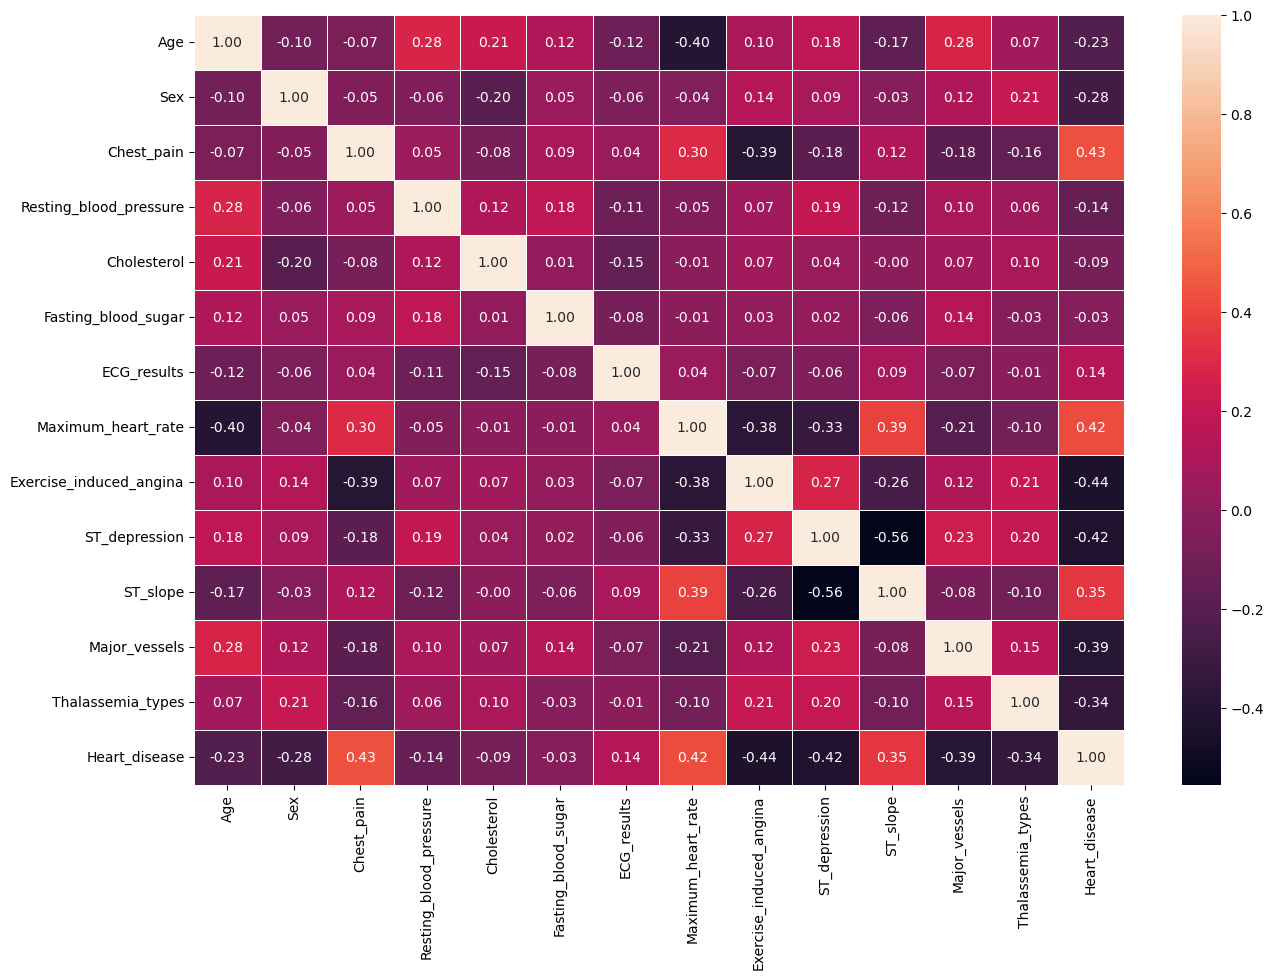

In [35]:
# Let's make our correlation matrix visual
corr_matrix=df.corr()
fig,ax=plt.subplots(figsize=(15,10))
ax=sns.heatmap(corr_matrix,
               annot=True,
               linewidths=0.5,
               fmt=".2f"
              )

In [37]:
X=df.drop(['Heart_disease'],axis=1)
y=df['Heart_disease']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

## 1. Logistic Regression

In [39]:
lr=LogisticRegression()

In [41]:
lr.fit(X_train,y_train)

LogisticRegression()

In [42]:
#Training score

lr.score(X_train,y_train)

0.8512396694214877

In [43]:
#Prediction of the test variable

lr_y_preds=lr.predict(X_test)

In [44]:
#Testing accuracy

lr.score(X_test,y_test)

0.8852459016393442

### Confusion Matrix

In [46]:
sns.set(font_scale=1.5)

def plot_conf_mat(y_test,y_preds):
    """
    Plots a nice looking confusion matrix using Seaborn's heatmap
    """
    fig,ax=plt.subplots(figsize=(3,3))
    ax=sns.heatmap(confusion_matrix(y_test,y_preds),annot=True,cbar=False)
    plt.xlabel("True Label")
    plt.ylabel("Predicted Label")


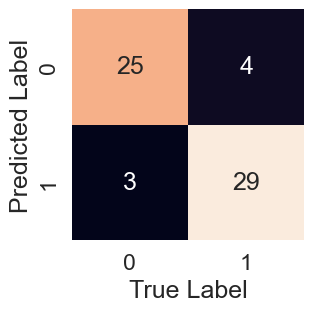

In [48]:
plot_conf_mat(y_test,lr_y_preds)

### Classification Report

In [50]:
print(classification_report(y_test,lr_y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



## 2. K-Nearest Neighbour

In [52]:
knn=KNeighborsClassifier()

In [54]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [55]:
#Training score

knn.score(X_train,y_train)

0.7603305785123967

In [56]:
#Prediction of the test variable

knn_y_preds=knn.predict(X_test)

In [57]:
#Testing accuracy

knn.score(X_test,y_test)

0.6885245901639344

### Confusion Matrix

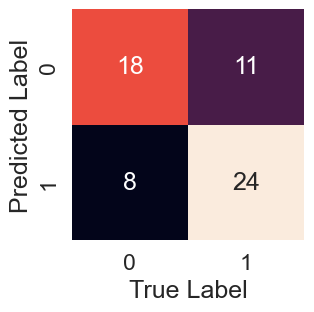

In [58]:
plot_conf_mat(y_test,knn_y_preds)

### Classification Report

In [59]:
print(classification_report(y_test,knn_y_preds))

              precision    recall  f1-score   support

           0       0.69      0.62      0.65        29
           1       0.69      0.75      0.72        32

    accuracy                           0.69        61
   macro avg       0.69      0.69      0.69        61
weighted avg       0.69      0.69      0.69        61



## 3. Random Forest

In [150]:
rf=RandomForestClassifier()

In [151]:
rf.fit(X_train,y_train)

RandomForestClassifier()

In [152]:
#Training score

rf.score(X_train,y_train)

1.0

In [153]:
#Prediction of the test variable

rf_y_preds=rf.predict(X_test)

In [154]:
#Testing accuracy

rf.score(X_test,y_test)

0.8688524590163934

### Confusion Matrix

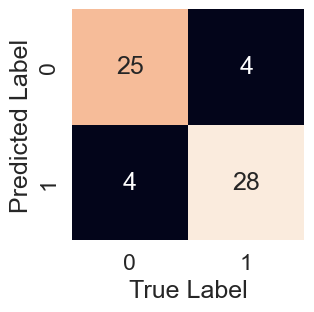

In [65]:
plot_conf_mat(y_test,rf_y_preds)

### Classification Report

In [66]:
print(classification_report(y_test,rf_y_preds))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86        29
           1       0.88      0.88      0.88        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



# SVM

In [67]:
svm = SVC()

In [68]:
svm.fit(X_train,y_train)

SVC()

In [69]:
svm.score(X_train,y_train)

0.6570247933884298

In [70]:
preds=svm.predict(X_test)
svm.score(X_test,y_test)

0.7049180327868853

# 5.Decision Tree

In [137]:
from sklearn.tree import DecisionTreeClassifier

dtc=DecisionTreeClassifier()
dtc.fit(X_train, y_train)

y_pred3=dtc.predict(X_test)

acc3=accuracy_score(y_test,y_pred3)


accuracy_score(y_train, dtc.predict(X_train))

print("Accuracy score of the model is:", accuracy_score(y_test,y_pred3)*100,"%")

Accuracy score of the model is: 83.60655737704919 %


In [138]:
from sklearn.model_selection import GridSearchCV
grid_params = {

'criterion': ['gini', 'entropy'],
'max_depth': [3, 5, 7, 10],
'min_samples_split': range(2, 10, 1),
'min_samples_leaf': range(2, 10, 1)
}
grid_search = GridSearchCV(dtc, grid_params, cv=5, n_jobs=-1, verbose = 1)

grid_search.fit(X_train, y_train)


Fitting 5 folds for each of 512 candidates, totalling 2560 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 10],
                         'min_samples_leaf': range(2, 10),
                         'min_samples_split': range(2, 10)},
             verbose=1)

In [141]:
grid_search.best_score_

0.8017006802721088

# 6.  Boosting

In [142]:
from sklearn.ensemble import AdaBoostClassifier

ada=AdaBoostClassifier(estimator = dtc)

parameters = {

'n_estimators': [50, 70, 90, 120, 180, 200], 
'learning_rate': [0.001, 0.01, 0.1, 1, 10],
'algorithm': ['SAMME', 'SAMME.R']

}

grid_search=GridSearchCV(ada, parameters, n_jobs=-1, cv=5, verbose = 1)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


GridSearchCV(cv=5,
             estimator=AdaBoostClassifier(estimator=DecisionTreeClassifier()),
             n_jobs=-1,
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'learning_rate': [0.001, 0.01, 0.1, 1, 10],
                         'n_estimators': [50, 70, 90, 120, 180, 200]},
             verbose=1)

In [143]:
from sklearn.ensemble import GradientBoostingClassifier

gbc=GradientBoostingClassifier()

parameters = {
'loss': ['deviance', 'exponential'],
'learning_rate': [0.001, 0.1, 1, 10],
'n_estimators': [100, 150, 180, 200]
}
gbc = GridSearchCV(gbc, parameters, cv = 5,n_jobs = -1, verbose = 1)

gbc.fit(X_train, y_train)

y_pred6=gbc.predict(X_test)

acc6=accuracy_score(y_test,y_pred6)

print("Accuracy score of the model is:", accuracy_score(y_test,y_pred6)*100,"%")

Fitting 5 folds for each of 32 candidates, totalling 160 fits
Accuracy score of the model is: 77.04918032786885 %


In [145]:
from xgboost import XGBClassifier

xgb=XGBClassifier(booster = 'gblinear', learning_rate = 1, max_depth = 6, n_estimators = 10) 
xgb.fit(X_train, y_train)

y_pred7=xgb.predict(X_test)

acc7=accuracy_score(y_test,y_pred7)

print("Accuracy score of the model is:", accuracy_score(y_test,y_pred7)*100,"%")

print("Confusion matrix of the model", confusion_matrix(y_test,y_pred7))

print("Classification Report", classification_report(y_test,y_pred7))

Accuracy score of the model is: 86.88524590163934 %
Confusion matrix of the model [[26  3]
 [ 5 27]]
Classification Report               precision    recall  f1-score   support

           0       0.84      0.90      0.87        29
           1       0.90      0.84      0.87        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



In [147]:
model_scores={'Logistic Regression':lr.score(X_test,y_test),
             'KNN':knn.score(X_test,y_test),
             'Random Forest':rf.score(X_test,y_test),
             'svm':svm.score(X_test,y_test),
             'Decision Tree':dtc.score(X_test,y_test),
             'Gradient Boosting Classifier':gbc.score(X_test,y_test),
             'XGB Classifier':xgb.score(X_test,y_test)
             }

In [149]:
model_scores

{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8688524590163934,
 'svm': 0.7049180327868853,
 'Decision Tree': 0.8360655737704918,
 'Gradient Boosting Classifier': 0.7704918032786885,
 'XGB Classifier': 0.8688524590163934}

## Model Comparison

In [155]:
#Based on accuracy
model_compare=pd.DataFrame(model_scores,index=['accuracy'])
model_compare

Logistic Regression       KNN  Random Forest       svm  \
accuracy             0.885246  0.688525       0.868852  0.704918   

          Decision Tree  Gradient Boosting Classifier  XGB Classifier  
accuracy       0.836066                      0.770492        0.868852

In [157]:
from joblib import Parallel, delayed
import joblib
#joblib.dump(lr, 'heart.sav')

<Axes: >

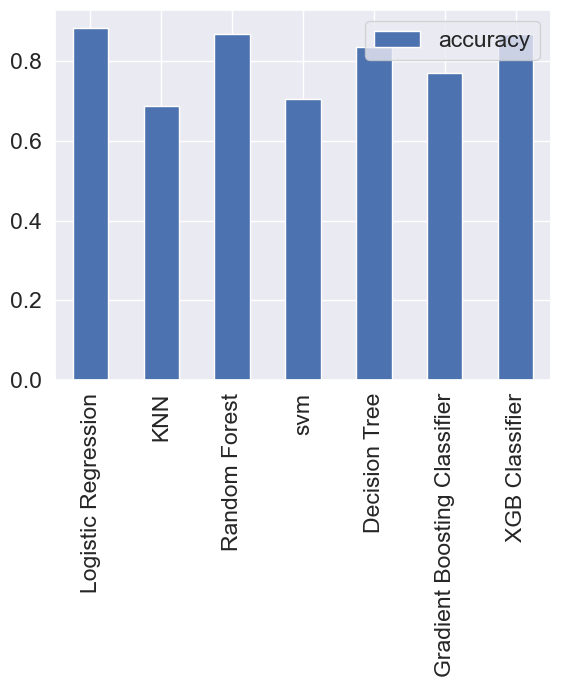

In [158]:
model_compare.T.plot(kind='bar') # (T is here for transpose)